In [204]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
#import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score, liftChart, gainsChart

In [205]:
# Load data into a dataframe (manually store data in a table - rows values and columns are headers/variable names)
df = pd.read_csv ("eaexercise1val.csv")
# how many rows and columns does the dataframe have
print(df.shape)

(3764, 161)


In [206]:
# print top and bottom rows of the dataframe as a sample to understand the data
# set option to print all columns
pd.set_option('display.max_columns', None)
df.head()

,PRCDDA,Township,PRIZM5DA,SG,LS,DensityClusterCode15,DensityClusterCode5,DensityClusterCode5_lbl,DEPVAR7,TOT__SPENT7,ECYBASHPOP,CNBBAS19P,CNBBAS1934,CNBBAS35P,ECYHTA2529,ECYHTA3034,ECYHTA5559,ECYHTA6064,ECYHTA6569,ECYHTA7074,ECYMTN2534,ECYMTN3544,ECYMTN4554,ECYHSZ1PER,ECYHSZ2PER,ECYMARM,ECYMARCL,ECYMARSING,ECYMARDIV,ECYMARWID,ECYCFSLP,ECYCHAKIDS,ECYTENOWN,ECYPOC17P,ECYSTYSING,ECYSTYSEMI,ECYSTYAPT,ECYSTYAPU5,ECYCDOIC,ECYEDUHSCE,ECYEDUUD,ECYACTINLF,ECYACTUR,ECYOCCMGMT,ECYOCCSCND,ECYINDMINE,ECYINDCSTR,ECYINDMANU,ECYINDWHOL,ECYINDRETL,ECYINDINFO,ECYINDFINA,ECYINDREAL,ECYINDPROF,ECYINDMGMT,ECYINDADMN,ECYINDEDUC,ECYINDHLTH,ECYINDARTS,ECYINDOSER,ECYINDPUBL,ECYPOWHOME,ECYPOWOSCA,ECYPOWNFIX,ECYTRADRIV,ECYTRAPSGR,ECYTRAPUBL,ECYTRAWALK,ECYTRABIKE,ECYRELCHR,ECYRELCATH,ECYHOMFREN,ECYHOMPANJ,ECYHOMCHIN,ECYHOMUKRA,ECYTIMSA,ECYTIMSAM,ECYPIMNI,WSIN100_P,WSWORTHV,WSCARDSB,WSD2AR,HSHC001S,HSRE001S,HSTA001S,HSGC001S,HSSH011,HSSH014,HSRM014,HSSH036A,HSSH037A,HSSH037B,HSFD990,HSFD991,HSCS013,HSCS007,HSCS008,HSHC001,HSHC002,HSHC003,HSHC004A,HSHC004B,HSHC007,HSHE012,HSTR058,HSTR034,HSTR050,HSRE001,HSRE040,HSRE042,HSRE052,HSRE061,HSRE063,HSRE006,HSRE011,HSRE021,HSRV001B,HSCL001,HSCM001D,HSCM001F,HSCL011,HSED005,HSED006,HSRO001,HSRO002,HSTA002A,HSTA002B,HSTA005,HSTA006,HSGC001,HSMG008,HSWH015,SV00002,SV00005,SV00011,SV00012,SV00021,SV00023,SV00025,SV00028,SV00029,SV00030,SV00035,SV00036,SV00037,SV00038,SV00041,SV00043,SV00044,SV00058,SV00061,SV00064,SV00066,SV00070,SV00074,SV00077,SV00079,SV00271,SV00086,SV00091,SV00093
0,35180018,Uxbridge,24,E2,F3,4,3,Exurban,16.90,19979.65,1643,1182,283,899,4.199635,4.564820,7.364577,5.660377,3.712721,3.225806,7.249071,26.579926,22.118959,10.780669,29.368030,56.168582,8.429119,24.597701,4.214559,3.831418,13.721414,645,95.539033,1.858736,88.289963,2.044610,7.806691,5.762082,4.646840,24.750958,28.045977,74.099617,3.8,12.107280,0.306513,0.076628,4.291188,5.517241,6.053640,10.191571,3.601533,4.674330,0.153257,6.360153,0.153257,3.601533,4.674330,6.819923,2.528736,2.145594,6.590038,7.203065,0.229885,8.582375,51.647510,3.371648,4.367816,3.831418,0.306513,61.594644,16.189897,0.060864,0,0.121729,0.000000,0.973828,0.365186,87.401096,55.909944,9.927935e+05,9641.367905,0.2230,4.724455,5.646276,3.554094,0.932912,46.150551,14.763638,0.005745,0.147634,0.061531,0.005163,32.084160,28.478595,0.266092,9.494167,0.252741,2.296389e+06,86.483288,16.922376,0.798481,13.044134,1.641684,2.750392,0.019031,4.613748,11.481902,2.744453e+06,10.988080,1.271969,0.153705,24.841012,5.010886,0.787101,6.418231,0.100335,0.509309,2.120012e+06,1.139349,0.265481,1.807019,39.693043,24.272401,238478.87490,19.758221,26.736629,1.024829,72.238542,23.025101,453455.1051,15.662666,0.030839,18.927568,19.096251,23.311482,27.418706,25.346891,22.741141,18.996828,21.320954,21.583219,21.910262,18.453241,18.949244,18.447102,23.702589,24.691902,25.447786,25.836316,322.735391,20.256827,25.373166,23.030345,20.121401,29.906413,25.941500,18.698091,25.550912,26.812864,24.426433,22.872993
1,35180019,Uxbridge,22,S4,F5,12,4,Town,9.28,5473.75,755,590,136,454,5.562914,4.370861,8.476821,6.622517,6.092715,5.033113,9.342561,15.570934,17.301038,24.913495,27.681661,48.906250,7.500000,26.250000,5.781250,7.187500,17.431193,273,81.314879,1.384083,80.968858,0.000000,19.031142,16.608997,5.882353,38.593750,25.000000,64.375000,4.4,12.812500,0.781250,0.156250,4.531250,5.937500,4.062500,10.156250,2.968750,4.375000,0.312500,6.093750,0.156250,3.906250,5.000000,5.156250,5.468750,0.000000,1.562500,1.406250,0.156250,10.156250,47.343750,4.531250,0.781250,5.937500,0.781250,74.966887,23.841060,0.132450,0,0.000000,0.000000,0.529801,0.000000,90.463576,47.386760,1.033533e+06,7579.687279,0.2021,5.083611,5.612669,4.410335,1.674133,34.774782,16.025167,0.004711,0.067155,0.031144,0.004004,36.529388,32.381244,0.225230,10.002918,0.305371,1.198746e+06,87.406870,18.890882,1.521295,13.897059,2.702712,1.734992,0.028174,6.192621,15.291829,1.323501e+06,8.803969,0.923302,0.090148,23.860950,2.841615,1.793503,5.521355,0.156

In [207]:
#list data types of the variables in the dataframe
df.dtypes

PRCDDA        int64
Township     object
PRIZM5DA     object
SG           object
LS           object
             ...   
SV00079     float64
SV00271     float64
SV00086     float64
SV00091     float64
SV00093     float64
Length: 161, dtype: object

In [208]:
# looking at descriptive statistics for all variables
df.describe()

,PRCDDA,DensityClusterCode15,DensityClusterCode5,DEPVAR7,TOT__SPENT7,ECYBASHPOP,CNBBAS19P,CNBBAS1934,CNBBAS35P,ECYHTA2529,ECYHTA3034,ECYHTA5559,ECYHTA6064,ECYHTA6569,ECYHTA7074,ECYMTN2534,ECYMTN3544,ECYMTN4554,ECYHSZ1PER,ECYHSZ2PER,ECYMARM,ECYMARCL,ECYMARSING,ECYMARDIV,ECYMARWID,ECYCFSLP,ECYCHAKIDS,ECYTENOWN,ECYPOC17P,ECYSTYSING,ECYSTYSEMI,ECYSTYAPT,ECYSTYAPU5,ECYCDOIC,ECYEDUHSCE,ECYEDUUD,ECYACTINLF,ECYACTUR,ECYOCCMGMT,ECYOCCSCND,ECYINDMINE,ECYINDCSTR,ECYINDMANU,ECYINDWHOL,ECYINDRETL,ECYINDINFO,ECYINDFINA,ECYINDREAL,ECYINDPROF,ECYINDMGMT,ECYINDADMN,ECYINDEDUC,ECYINDHLTH,ECYINDARTS,ECYINDOSER,ECYINDPUBL,ECYPOWHOME,ECYPOWOSCA,ECYPOWNFIX,ECYTRADRIV,ECYTRAPSGR,ECYTRAPUBL,ECYTRAWALK,ECYTRABIKE,ECYRELCHR,ECYRELCATH,ECYHOMFREN,ECYHOMPANJ,ECYHOMCHIN,ECYHOMUKRA,ECYTIMSA,ECYTIMSAM,ECYPIMNI,WSIN100_P,WSWORTHV,WSCARDSB,WSD2AR,HSHC001S,HSRE001S,HSTA001S,HSGC001S,HSSH011,HSSH014,HSRM014,HSSH036A,HSSH037A,HSSH037B,HSFD990,HSFD991,HSCS013,HSCS007,HSCS008,HSHC001,HSHC002,HSHC003,HSHC004A,HSHC004B,HSHC007,HSHE012,HSTR058,HSTR034,HSTR050,HSRE001,HSRE040,HSRE042,HSRE052,HSRE061,HSRE063,HSRE006,HSRE011,HSRE021,HSRV001B,HSCL001,HSCM001D,HSCM001F,HSCL011,HSED005,HSED006,HSRO001,HSRO002,HSTA002A,HSTA002B,HSTA005,HSTA006,HSGC001,HSMG008,HSWH015,SV00002,SV00005,SV00011,SV00012,SV00021,SV00023,SV00025,SV00028,SV00029,SV00030,SV00035,SV00036,SV00037,SV00038,SV00041,SV00043,SV00044,SV00058,SV00061,SV00064,SV00066,SV00070,SV00074,SV00077,SV00079,SV00271,SV00086,SV00091,SV00093
count,3.764000e+03,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3.764000e+03,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3.764000e+03,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3.764000e+03,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3.764000e+03,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3.764000e+03,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3.764000e+03,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000
mean,3.520677e+07,2.709617,1.380181,11.343664,8423.380303,861.120085,680.209086,201.592986,478.616100,7.260587,6.952813,7.459317,6.345978,5.144638,4.047348,11.340062,17.963028,22.588534,19.750847,27.878324,50.916707,5.423999,29.693559,5.562768,5.287244,17.606517,289.788789,74.017060,2.512398,51.352256,8.788336,30.894251,11.035884,11.321205,23.798725,32.897122,63.631329,6.466180,6.962621,2.726696,0.128416,3.500817,6.045178,3.340297,6.854061,2.310010,4.477232,1.465104,6.243867,0.086917,2.944380,4.546284,5.445025,1.418078,2.731003,3.055409,4.054530,0.308652,6.566946,35.953849,2.967895,12.365458,2.410439,0.828568,58.157244,31.181273,0.5188

In [209]:
# DEPVAR7 - Target Variable

#calcuate and print statistics for a specific variable: mean, standard deviation, min, max, median, length, and missing values of CRIM variable
print('Mean : ', df.DEPVAR7.mean())
print('Std. dev : ', df.DEPVAR7.std())
print('Min : ', df.DEPVAR7.min())
print('Max : ', df.DEPVAR7.max())
print('Median : ', df.DEPVAR7.median())
print('Length : ', len(df.DEPVAR7))
print('Number of missing values : ', df.DEPVAR7.isnull().sum())

Mean :  11.343663655685432
Std. dev :  5.786855632155612
Min :  0.0
Max :  32.76
Median :  10.0
Length :  3764
Number of missing values :  0


In [210]:
#count number of unique values in each variable 
#depending on number of unique values we will choose visual display plot accordingly <10 freq plot

#pd.set_option('display.max_rows', None)
df.nunique()

PRCDDA      3764
Township      19
PRIZM5DA      50
SG            16
LS            14
            ... 
SV00079     3508
SV00271     3505
SV00086     3504
SV00091     3506
SV00093     3503
Length: 161, dtype: int64

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [212]:
sns.set(color_codes=True)

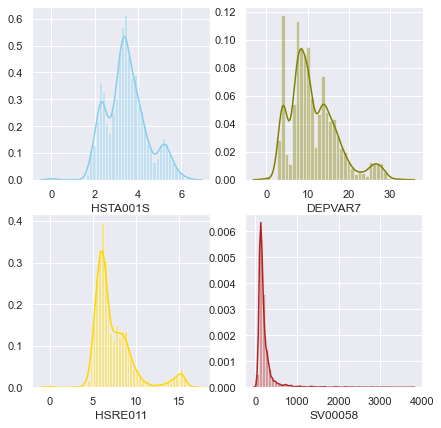

In [213]:
# Plot univariate 
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.distplot(df["DEPVAR7"] , color="olive", ax=axes[0, 1])
sns.distplot(df["HSTA001S"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["HSRE011"] , color="gold", ax=axes[1, 0])
sns.distplot( df["SV00058"] , color="firebrick", ax=axes[1, 1])
plt.show()

In [214]:
predictors = ['HSRE011', 'HSTA001S', 'HSFD991', 'HSGC001S', 'HSRE040', 'HSHC007', 'HSRE042', 'HSRE052', 'HSHC003', 'ECYHTA5559', 'ECYHTA2529', 'ECYMARM', 'HSTR058', 'HSTA005']
outcome = 'DEPVAR7'

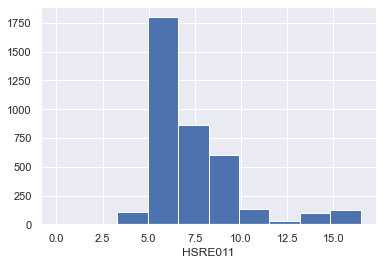

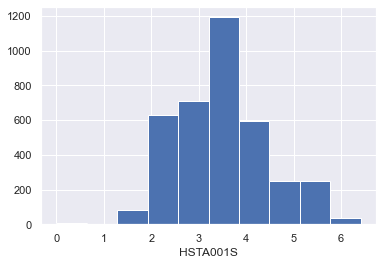

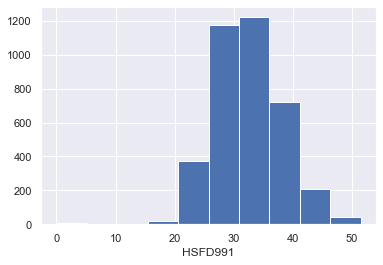

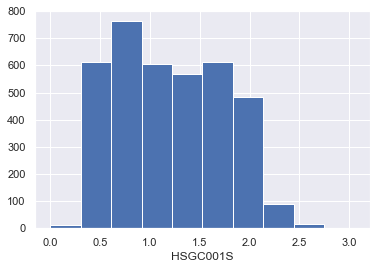

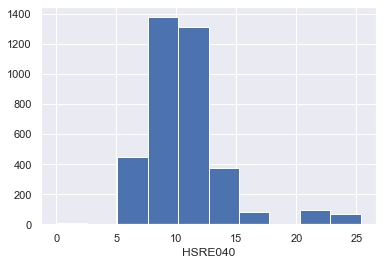

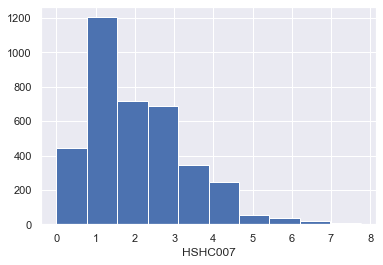

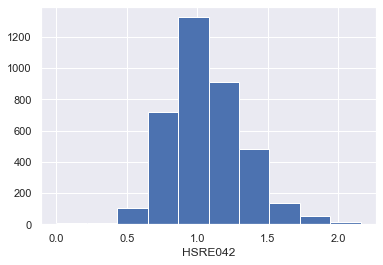

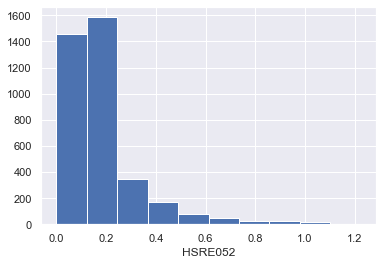

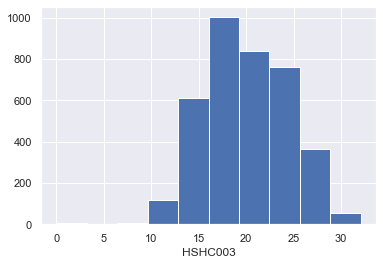

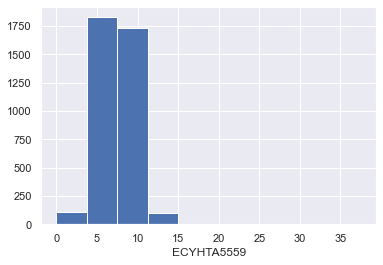

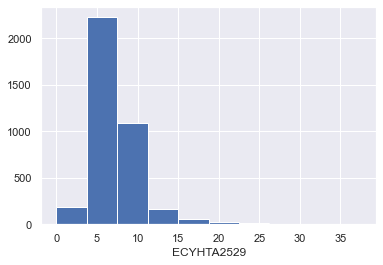

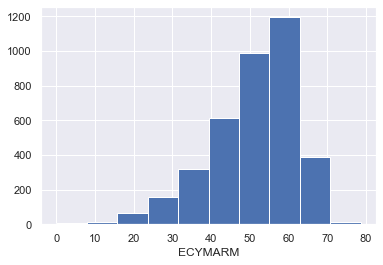

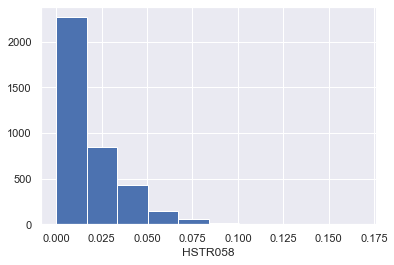

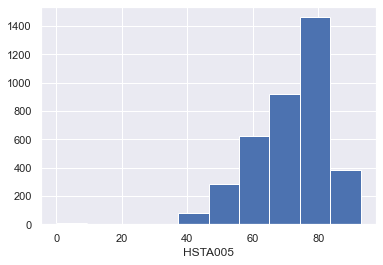

In [215]:
# Distribution of the quantitative variables in our dataframe

quant_vars=df[predictors]
all_numeric_df = df[predictors]
for var in quant_vars:
    #fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.hist(all_numeric_df[var].dropna())
    plt.xlabel(var)
    plt.show()

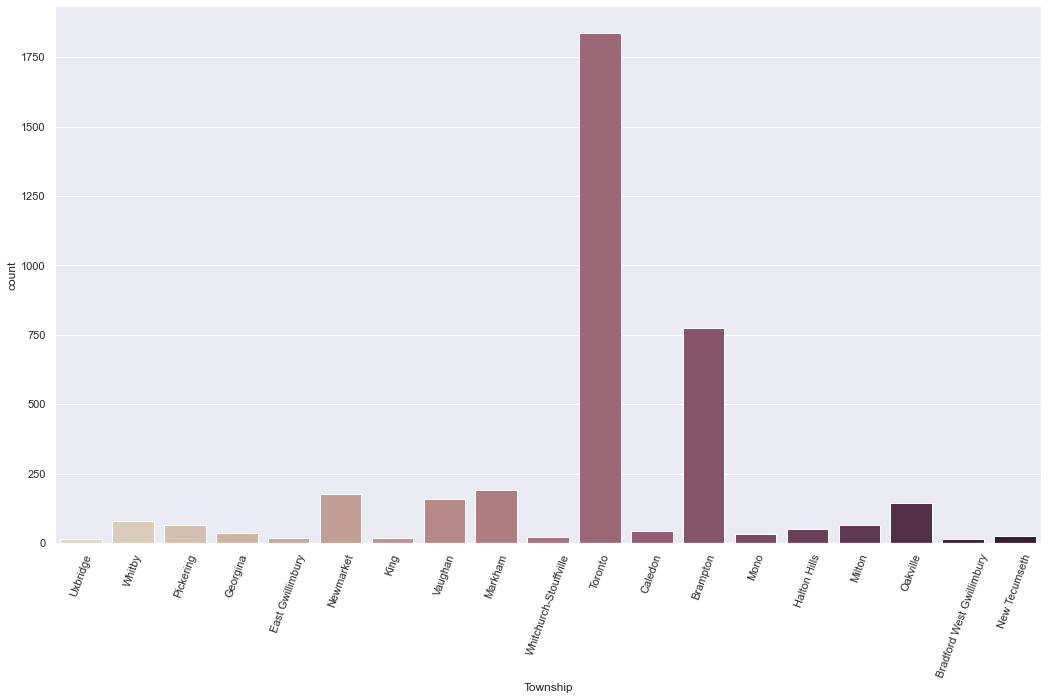

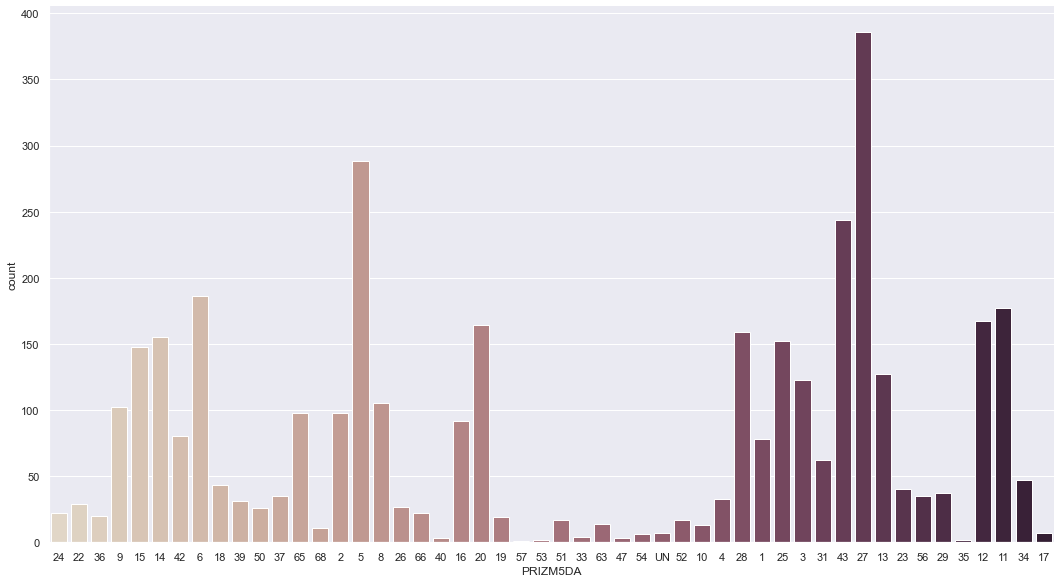

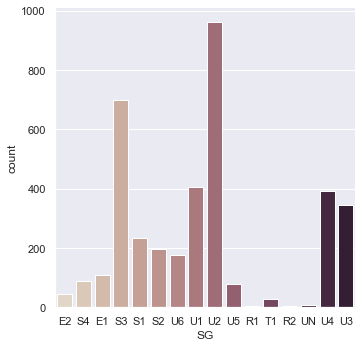

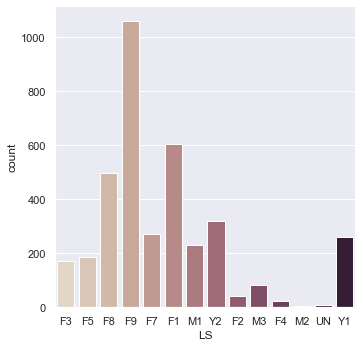

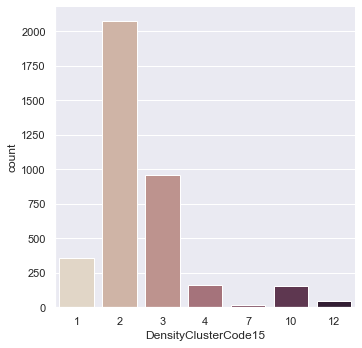

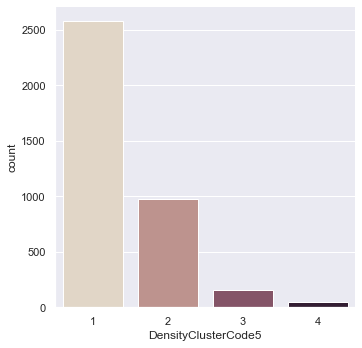

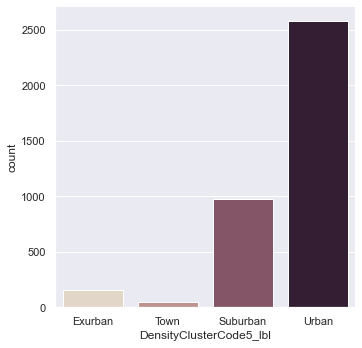

In [216]:
# Distribution of the categorical variables in our dataframe

from matplotlib import pyplot as plt
t = sns.catplot(x="Township", kind="count", palette="ch:.25", data=df, height=8.27, aspect=14.7/8.27)
t.set_xticklabels(rotation=70)
sns.catplot(x="PRIZM5DA", kind="count", palette="ch:.25", data=df, height=8.27, aspect=14.7/8.27)
sns.catplot(x="SG", kind="count", palette="ch:.25", data=df)
sns.catplot(x="LS", kind="count", palette="ch:.25", data=df)
sns.catplot(x="DensityClusterCode15", kind="count", palette="ch:.25", data=df)
sns.catplot(x="DensityClusterCode5", kind="count", palette="ch:.25", data=df)
sns.catplot(x="DensityClusterCode5_lbl", kind="count", palette="ch:.25", data=df)
plt.show()

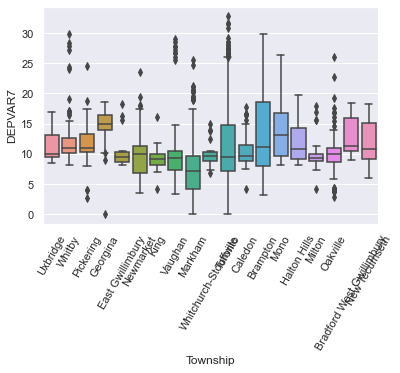

In [217]:
# DEPVAR7 vs Township
ax = sns.boxplot(x='Township', y='DEPVAR7', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

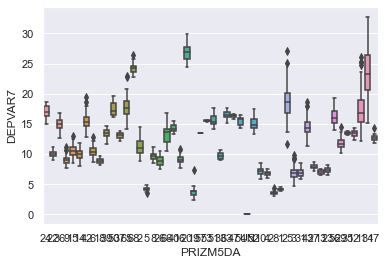

In [218]:
#sns.stripplot(x='PRIZM5DA', y='DEPVAR7', data=df)
sns.boxplot(x='PRIZM5DA', y='DEPVAR7', data=df)
plt.rcParams['figure.figsize'] = 14.7,8.27

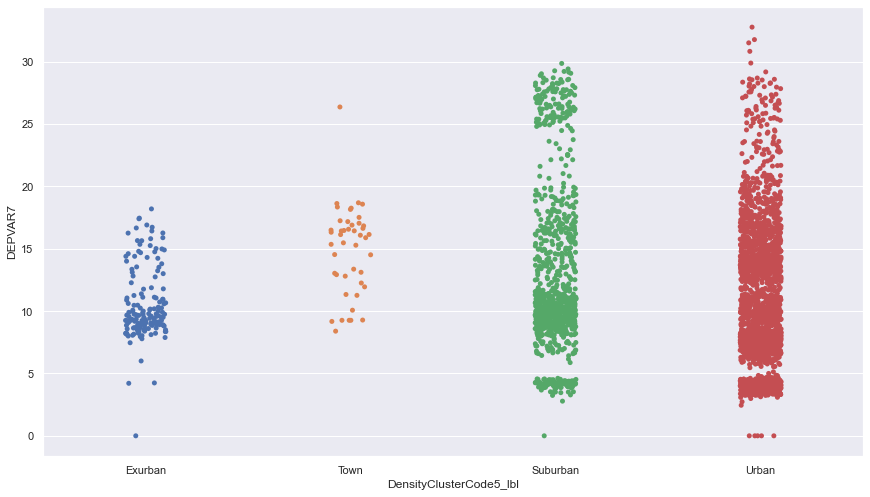

In [219]:
sns.stripplot(x='DensityClusterCode5_lbl', y='DEPVAR7', data=df)
plt.show()
#sns.boxplot(x='DensityClusterCode5_lbl', y='DEPVAR7', data=df)

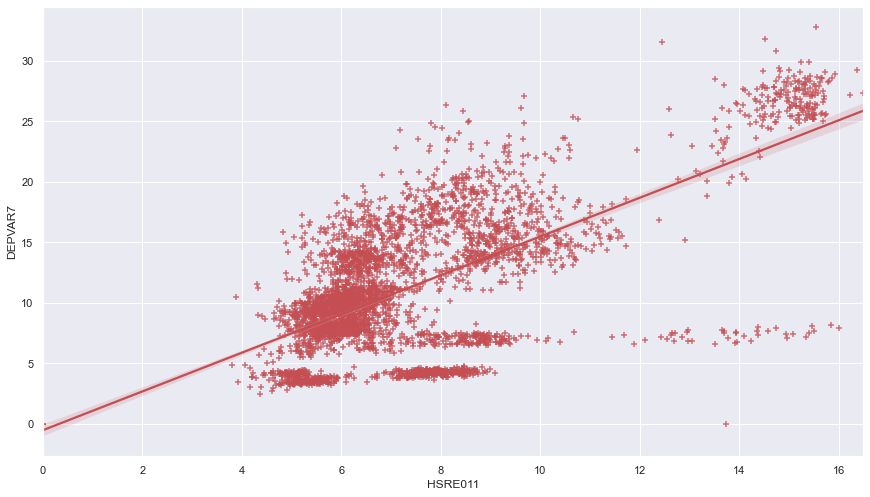

In [220]:
# Plotting the 'HSRE011' against the 'DEPVAR7'.

sns.regplot(x='HSRE011', y='DEPVAR7', data=df, color='r', marker='+')
plt.rcParams['figure.figsize'] = 14.7,8.27

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

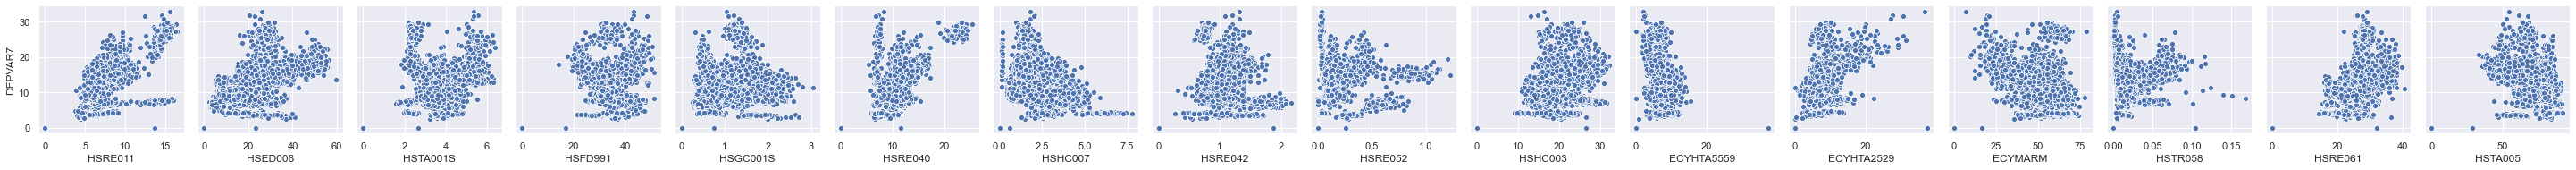

In [222]:
# *****We need to hide this from the professor********

pp = sns.pairplot(data=df,
                  y_vars=['DEPVAR7'],
                  x_vars=['HSRE011', 'HSED006', 'HSTA001S', 'HSFD991', 'HSGC001S', 'HSRE040', 'HSHC007', 'HSRE042', 'HSRE052', 'HSHC003', 'ECYHTA5559', 'ECYHTA2529', 'ECYMARM', 'HSTR058', 'HSRE061', 'HSTA005'])

In [223]:
pred1 = df[predictors].corr()

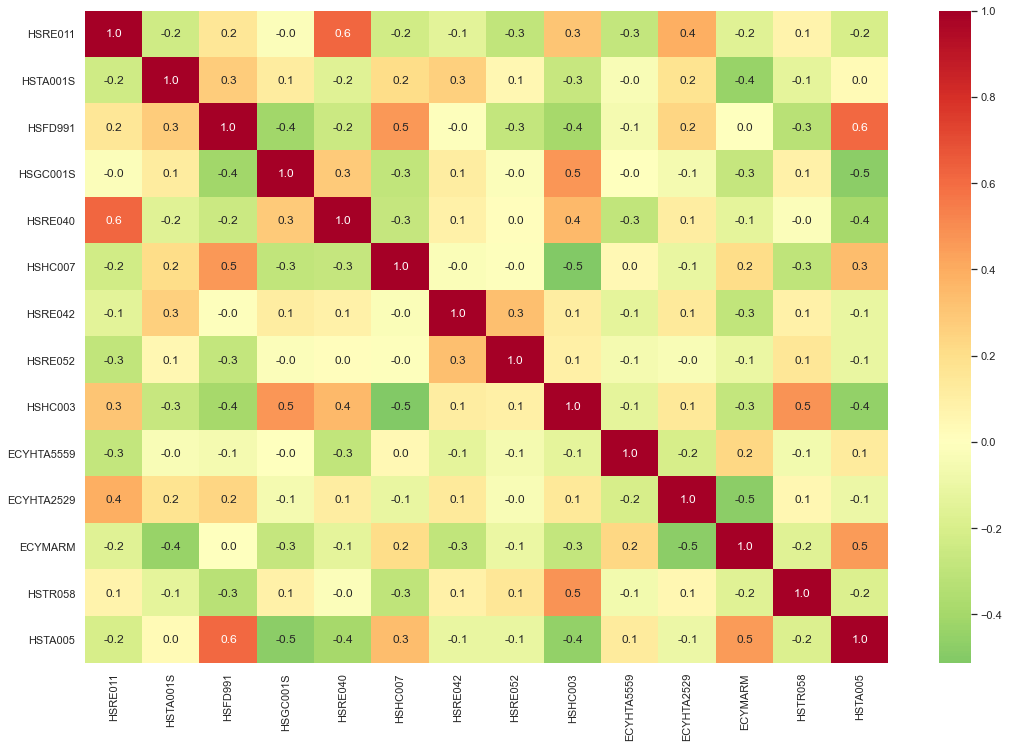

In [224]:
# DEPVAR7 correlation

#heatmap using seaborn
#If the correlation between variables if greater than 0.7 we can say that the two variables are highly correlated. 
#From the above table, the pairs of highly correlated variables are:
fig, ax = plt.subplots()
fig.set_size_inches(18, 12)
sns.heatmap(pred1, annot=True, fmt=".1f", cmap="RdYlGn_r", center=0, ax=ax)
plt.show()

In [225]:
# Highest Correlations
df[predictors].corr().unstack().sort_values(ascending = False).drop_duplicates().head(15)

HSTA005   HSTA005       1.000000
HSRE040   HSRE011       0.620866
HSFD991   HSTA005       0.611167
HSTR058   HSHC003       0.483837
HSGC001S  HSHC003       0.469453
HSFD991   HSHC007       0.465868
HSTA005   ECYMARM       0.458878
HSRE011   ECYHTA2529    0.392822
HSHC003   HSRE040       0.360641
HSTA005   HSHC007       0.343021
HSRE042   HSRE052       0.336797
HSRE011   HSHC003       0.311128
HSGC001S  HSRE040       0.281080
HSTA001S  HSFD991       0.274791
HSRE042   HSTA001S      0.263470
dtype: float64

In [226]:
# Lowest Correlations
df[predictors].corr().unstack().sort_values(ascending = True).drop_duplicates().head(15)

HSHC007     HSHC003      -0.513016
ECYHTA2529  ECYMARM      -0.475850
HSTA005     HSGC001S     -0.473216
HSHC003     HSTA005      -0.448253
ECYMARM     HSTA001S     -0.439719
HSFD991     HSGC001S     -0.407623
HSTA005     HSRE040      -0.392477
HSHC003     HSFD991      -0.390301
HSFD991     HSTR058      -0.319488
HSHC007     HSTR058      -0.296990
HSRE042     ECYMARM      -0.294103
HSHC007     HSGC001S     -0.291261
HSRE011     HSRE052      -0.290430
HSRE040     ECYHTA5559   -0.289495
ECYMARM     HSHC003      -0.284116
dtype: float64

In [227]:
X = df[predictors]
y = df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


print("Training   : ", train_X.shape)
print("Validation : ", valid_X.shape)

Training   :  (2258, 14)
Validation :  (1506, 14)


In [228]:
# Linear Regression

lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [229]:
# print coefficients

print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  2.2357884861557267
     Predictor  coefficient
0      HSRE011     1.222810
1     HSTA001S     3.289924
2      HSFD991    -0.250890
3     HSGC001S    -3.204470
4      HSRE040     0.623160
5      HSHC007    -0.794735
6      HSRE042    -5.697905
7      HSRE052     5.491886
8      HSHC003     0.047472
9   ECYHTA5559    -0.247170
10  ECYHTA2529     0.158350
11     ECYMARM     0.009451
12     HSTR058    15.501301
13     HSTA005    -0.006858

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 2.2544
     Mean Absolute Error (MAE) : 1.7093


In [230]:
# Model stats on the training set

pred_y = lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, lm))
print('AIC : ', AIC_score(train_y, pred_y, lm))
print('BIC : ', BIC_score(train_y, pred_y, lm))

adjusted r2 :  0.8494692524358812
AIC :  10110.963224514606
BIC :  10202.518980429959


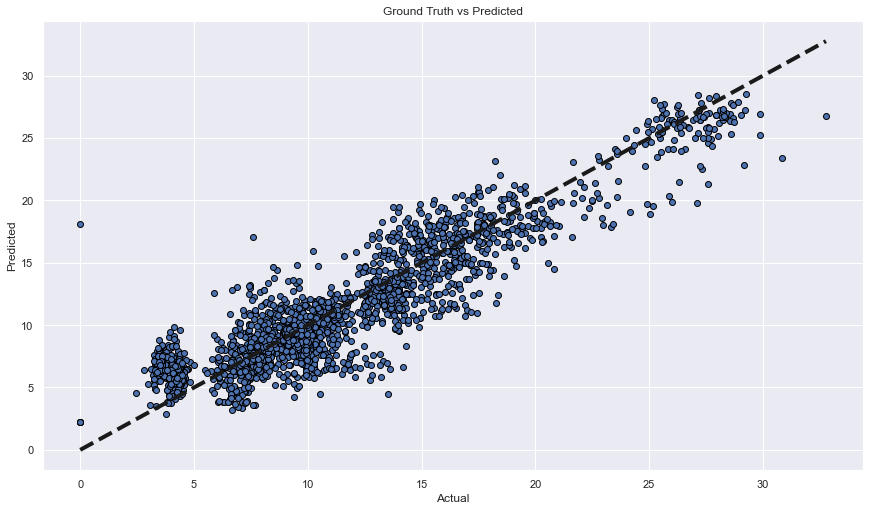

In [231]:
# Not sure about this plot

# Plotting the predictions vs actual on the training set. 

from sklearn.model_selection import cross_val_predict

# %matplotlib inline *****This is for when it does not show the graphs****


fig, ax = plt.subplots()
ax.scatter(train_y, pred_y, edgecolors=(0, 0, 0))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [232]:
# Use predict() to make predictions on a new set

lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, lm_pred)

      Predicted  Actual   Residual
1050  13.083551   13.25   0.166449
1865  17.573107   19.25   1.676893
1299  20.052169   18.66  -1.392169
3388   7.516133   10.31   2.793867
2639  17.278204   19.41   2.131796
812    7.524575    6.64  -0.884575
1459  16.988913   15.58  -1.408913
79    11.145751   14.04   2.894249
2553  13.344582   16.23   2.885418
1248  18.572340   22.59   4.017660
1551   6.428035    3.51  -2.918035
3670  10.600076   11.16   0.559924
1999   7.908160    7.56  -0.348160
1721   8.903868    9.67   0.766132
630    7.919258    6.86  -1.059258
563   11.526396   11.10  -0.426396
331    6.699620    3.44  -3.259620
3637  10.002406   11.93   1.927594
2582  20.658277   31.50  10.841723
3731  13.602449   14.85   1.247551

Regression statistics

               Mean Error (ME) : 0.1115
Root Mean Squared Error (RMSE) : 2.2929
     Mean Absolute Error (MAE) : 1.7719


In [233]:
lm_pred

array([13.08355142, 17.57310739, 20.05216926, ..., 16.60117807,
        6.03443501,  9.95223985])

In [234]:
# Model stats on the validation set

pred_y = lm.predict(valid_X)

print('adjusted r2 : ', adjusted_r2_score(valid_y, pred_y, lm))
print('AIC : ', AIC_score(valid_y, pred_y, lm))
print('BIC : ', BIC_score(valid_y, pred_y, lm))

adjusted r2 :  0.83764427450865
AIC :  6805.312635361902
BIC :  6890.38803389566


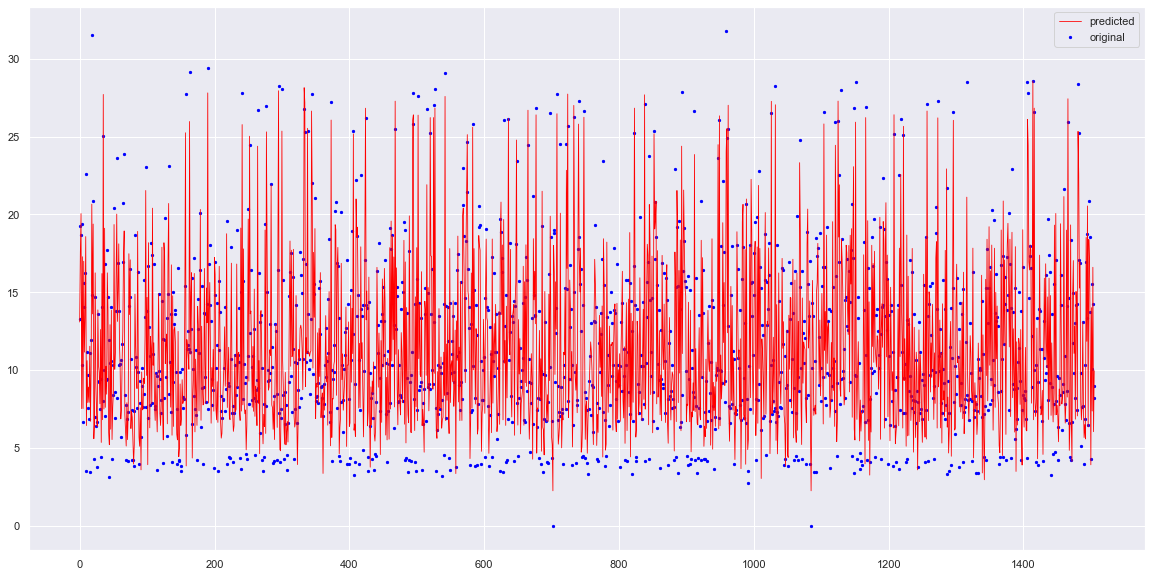

In [235]:
# Not sure about this plot


# Plotting predicted vs original

x_ax = range(len(valid_y))
plt.scatter(x_ax, valid_y, s=5, color="blue", label="original")
plt.plot(x_ax, pred_y, lw=0.8, color="red", label="predicted")
plt.legend()

plt.rcParams["figure.figsize"] = (20,10)
plt.show()

1.0


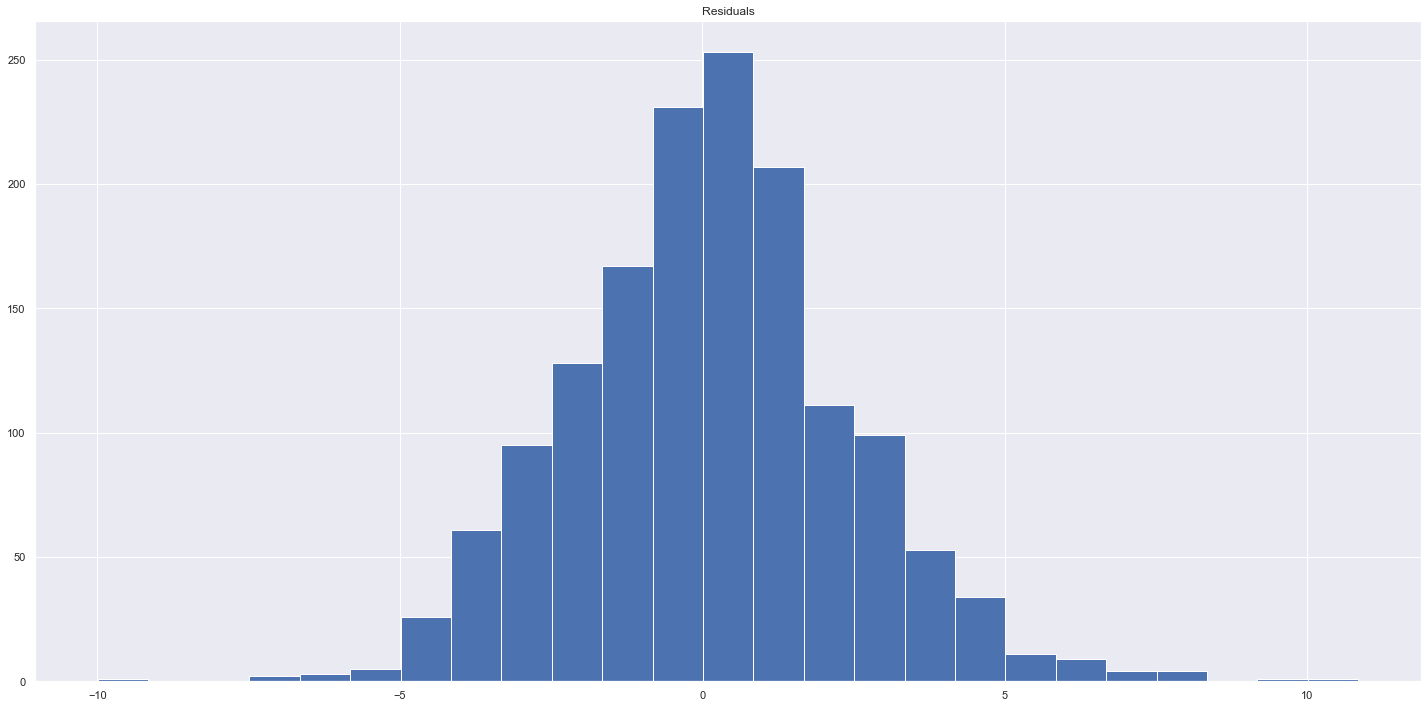

In [236]:
# Plotting Residuals

lm_pred = lm.predict(valid_X)
all_residuals = valid_y - lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Residuals')

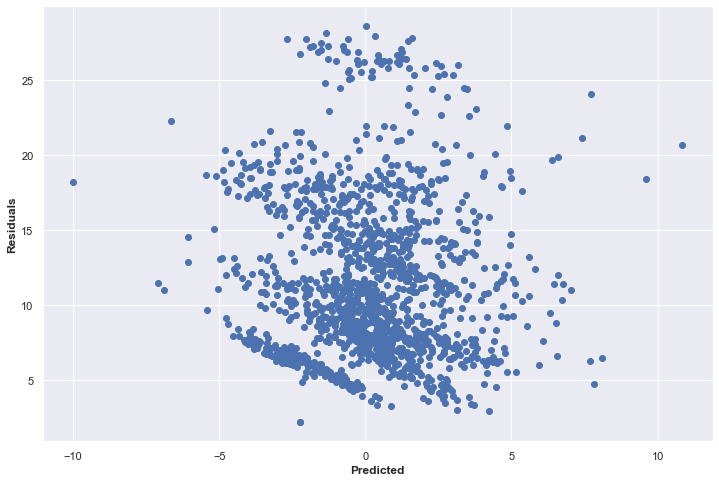

In [237]:
# Residuals vs predicted scatterplot

fig, ax = plt.subplots(figsize=(12,8))
_ = ax.scatter(all_residuals, lm_pred)

ax.set_xlabel('Predicted',  
               fontweight ='bold') 
ax.set_ylabel('Residuals',  
               fontweight ='bold') 

In [238]:
# Backward_elimination


def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: HSRE011, HSTA001S, HSFD991, HSGC001S, HSRE040, HSHC007, HSRE042, HSRE052, HSHC003, ECYHTA5559, ECYHTA2529, ECYMARM, HSTR058, HSTA005
Start: score=10110.96
Step: score=10109.84, remove HSTA005
Step: score=10108.88, remove ECYMARM
Step: score=10108.88, remove None
['HSRE011', 'HSTA001S', 'HSFD991', 'HSGC001S', 'HSRE040', 'HSHC007', 'HSRE042', 'HSRE052', 'HSHC003', 'ECYHTA5559', 'ECYHTA2529', 'HSTR058']


In [239]:
# Forward_selection

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
     if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()]*len(train_y),model, df=1)
     return AIC_score(train_y, model.predict(train_X[variables]), model)
best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: HSRE011, HSTA001S, HSFD991, HSGC001S, HSRE040, HSHC007, HSRE042, HSRE052, HSHC003, ECYHTA5559, ECYHTA2529, ECYMARM, HSTR058, HSTA005
Start: score=14372.73, constant
Step: score=13015.09, add HSRE011
Step: score=12577.70, add HSTA001S
Step: score=11845.34, add HSFD991
Step: score=11463.83, add HSGC001S
Step: score=11114.16, add HSRE040
Step: score=10883.24, add HSRE042
Step: score=10634.58, add HSHC007
Step: score=10314.83, add HSRE052
Step: score=10215.59, add ECYHTA5559
Step: score=10148.26, add ECYHTA2529
Step: score=10113.80, add HSTR058
Step: score=10108.88, add HSHC003
Step: score=10108.88, add None
['HSRE011', 'HSTA001S', 'HSFD991', 'HSGC001S', 'HSRE040', 'HSRE042', 'HSHC007', 'HSRE052', 'ECYHTA5559', 'ECYHTA2529', 'HSTR058', 'HSHC003']


In [240]:
# Stepwise_selection

best_model, best_variables =stepwise_selection(train_X.columns, train_model, score_model, 
                             verbose=True)
print(best_variables)

Variables: HSRE011, HSTA001S, HSFD991, HSGC001S, HSRE040, HSHC007, HSRE042, HSRE052, HSHC003, ECYHTA5559, ECYHTA2529, ECYMARM, HSTR058, HSTA005
Start: score=14372.73, constant
Step: score=13015.09, add HSRE011
Step: score=12577.70, add HSTA001S
Step: score=11845.34, add HSFD991
Step: score=11463.83, add HSGC001S
Step: score=11114.16, add HSRE040
Step: score=10883.24, add HSRE042
Step: score=10634.58, add HSHC007
Step: score=10314.83, add HSRE052
Step: score=10215.59, add ECYHTA5559
Step: score=10148.26, add ECYHTA2529
Step: score=10113.80, add HSTR058
Step: score=10108.88, add HSHC003
Step: score=10108.88, unchanged None
['HSRE011', 'HSTA001S', 'HSFD991', 'HSGC001S', 'HSRE040', 'HSRE042', 'HSHC007', 'HSRE052', 'ECYHTA5559', 'ECYHTA2529', 'HSTR058', 'HSHC003']


In [132]:
# Exhaustive_search

def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj           AIC  ECYHTA2529  ECYHTA5559  ECYMARM  HSFD991  HSGC001S  HSHC003  \
0    1  0.452122  13015.090002       False       False    False    False     False    False   
1    2  0.548804  12577.697801       False       False    False    False     False    False   
2    3  0.673927  11845.341569       False       False    False     True     False    False   
3    4  0.724739  11463.831799       False       False    False     True      True    False   
4    5  0.764333  11114.159796       False       False    False     True      True    False   
5    6  0.787337  10883.239314       False       False    False     True      True    False   
6    7  0.809596  10634.583972       False       False    False     True      True    False   
7    8  0.834810  10314.827278       False       False    False     True      True    False   
8    9  0.841982  10215.591693       False        True    False     True      True    False   
9   10  0.846692  10148.259332        True        

Validation: Gains and Lift Chart Results


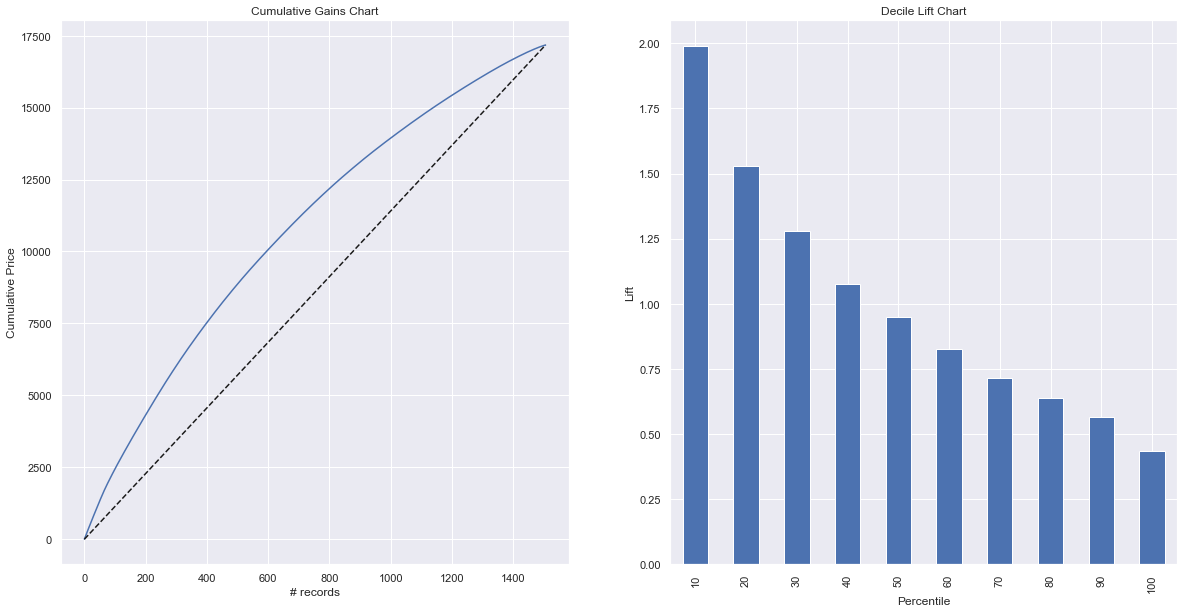

In [241]:
# Gains and Lift Chart

print('Validation: Gains and Lift Chart Results' )
pred_v = pd.Series(model.predict(valid_X))
pred_v = pred_v.sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel("Cumulative Price")
ax.set_title("Cumulative Gains Chart")

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel("Lift")
plt.rcParams["figure.figsize"] = (20,10)

plt.show()

In [242]:
# Regression Stats

from statsmodels.api import OLS
OLS(valid_y,valid_X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                DEPVAR7   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              3364.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):                        0.00
Time:                        00:21:30   Log-Likelihood:                         -3360.1
No. Observations:                1506   AIC:                                      6748.
Df Residuals:                    1492   BIC:                                      6823.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HSRE011        1.2109      0.049     24.537      0.000       1.114       1.308
HSTA001S       3.3345      0.079     42.033      0.000       3.179       3.490
HSFD991       -0.2622      0.020    -12.901      0.000      -0.302      -0.222
HSGC001S      -2.9725      0.149    -19.924      0.000      -3.265      -2.680
HSRE040        0.6245      0.030     20.542      0.000       0.565       0.684
HSHC007       -0.6395      0.063    -10.223      0.000      -0.762      -0.517
HSRE042       -5.2129      0.263    -19.818      0.000      -5.729      -4.697
HSRE052        5.4554      0.454     12.029      0.000       4.566       6.345
HSHC003        0.0381      0.019      1.993      0.046       0.001       0.076
ECYHTA5559    -0.0855      0.031     -2.727      0.006      -0.147      -0.024
ECYHTA2529     0.2507      0.024     10.521      0.000       0.204       0.297
ECYMARM        0.0262      0.007      3.582      0.000       0.012       0.040
HSTR058       22.4570      4.335      5.181      0.000      13.954      30.960
HSTA005       -0.0229      0.009     -2.521      0.012      -0.041      -0.005
==============================================================================
Omnibus:                       29.502   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.976
Skew:                           0.135   Prob(JB):                     8.53e-12
Kurtosis:                       3.860   Cond. No.                     7.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

               Mean Error (ME) : 0.1100
Root Mean Squared Error (RMSE) : 2.2964
     Mean Absolute Error (MAE) : 1.7763


In [244]:
# Random Forest

from sklearn.ensemble import  RandomForestRegressor


rf = RandomForestRegressor(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
y_pred = rf.predict(valid_X)

       feature  importance       std
9   ECYHTA5559    0.005945  0.006383
8      HSHC003    0.007687  0.005985
3     HSGC001S    0.019092  0.008798
5      HSHC007    0.020685  0.020540
13     HSTA005    0.031712  0.014412
10  ECYHTA2529    0.031909  0.013248
6      HSRE042    0.040629  0.025944
7      HSRE052    0.060975  0.025950
11     ECYMARM    0.068001  0.060770
1     HSTA001S    0.089338  0.052731
2      HSFD991    0.137167  0.031270
0      HSRE011    0.144643  0.138502
4      HSRE040    0.167846  0.175385
12     HSTR058    0.174371  0.169813


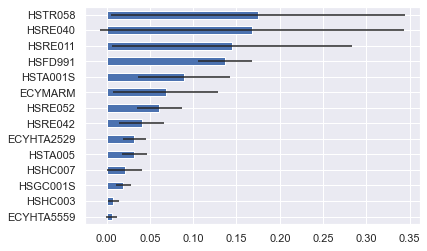

<Figure size 1440x1080 with 0 Axes>

In [245]:
# Variable importance plot

%matplotlib inline

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.figure(figsize=(20,15))

plt.tight_layout()
plt.show()

In [246]:
df_feature_long = pd.melt(df,var_name='feature name', value_name='values')

(-1.0, 14.0)

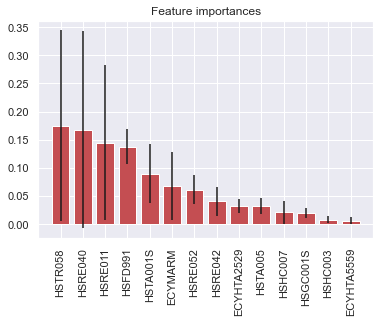

In [247]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

In [250]:
# Predicting Average Amount Spend on Cannabis($) based on random values:

HSRE011 = 6.418231
HSTA001S = 3.554094
HSFD991 = 28.478595
HSGC001S = 0.932912
HSRE040 = 10.988080
HSHC007 = 1.641684
HSRE042 = 1.271969
HSRE052 = 0.153705
HSHC003 = 16.922376
ECYHTA5559 = 7.364577
ECYHTA2529 = 4.199635
ECYMARM = 56.168582
HSTR058 = 0.019031
HSTA005 = 72.238542

print ('Predicted Average Amount Spend on Cannabis($): \n', model.predict([[HSRE011,
HSTA001S,
HSFD991,
HSGC001S,
HSRE040,
HSHC007,
HSRE042,
HSRE052,
HSHC003,
ECYHTA5559,
ECYHTA2529,
ECYMARM,
HSTR058,
HSTA005]]))

Predicted Average Amount Spend on Cannabis($): 
 [10.75993517]
